# Assignment - 11
# Decision Trees
# Question 2
Fraud data

In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [108]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [109]:
import sweetviz as sv 
sweet_report = sv.analyze(fraud)
sweet_report.show_html('Fraud_check.csv.html')   

                                             |                                             | [  0%]   00:00 ->…

Report Fraud_check.csv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [110]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [111]:
fraud.shape

(600, 6)

In [112]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


considering the taxable income,
those who have taxable income below 30000 as fraud and above 30000 as innocent

In [113]:
fraud['Taxable.Income'] = pd.cut(x=fraud['Taxable.Income'],bins=[10003, 30000, 99620], labels=['fraud','innocent'], right = False)
fraud['Taxable.Income']

0      innocent
1      innocent
2      innocent
3      innocent
4      innocent
         ...   
595    innocent
596    innocent
597    innocent
598    innocent
599    innocent
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['fraud' < 'innocent']

In [114]:
fraud['Taxable.Income'].value_counts()

innocent    476
fraud       124
Name: Taxable.Income, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

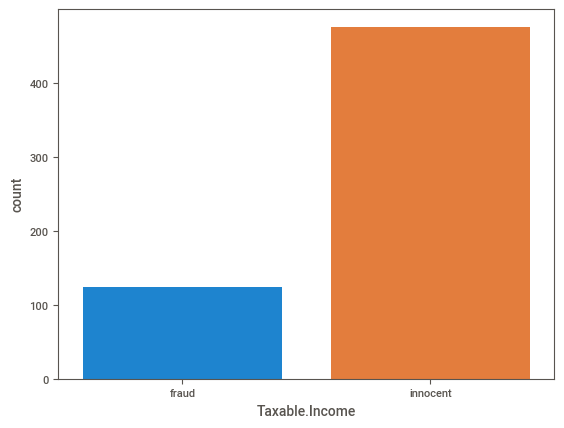

In [115]:
import seaborn as sns
sns.countplot(fraud['Taxable.Income'])

In [116]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,innocent,50047,10,YES
1,YES,Divorced,innocent,134075,18,YES
2,NO,Married,innocent,160205,30,YES
3,YES,Single,innocent,193264,15,YES
4,NO,Married,innocent,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,innocent,39492,7,YES
596,YES,Divorced,innocent,55369,2,YES
597,NO,Divorced,innocent,154058,0,YES
598,YES,Married,innocent,180083,17,NO


In [117]:
label_encoder = preprocessing.LabelEncoder()

fraud['Undergrad'] = label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Taxable.Income']=label_encoder.fit_transform(fraud['Taxable.Income'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

In [118]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

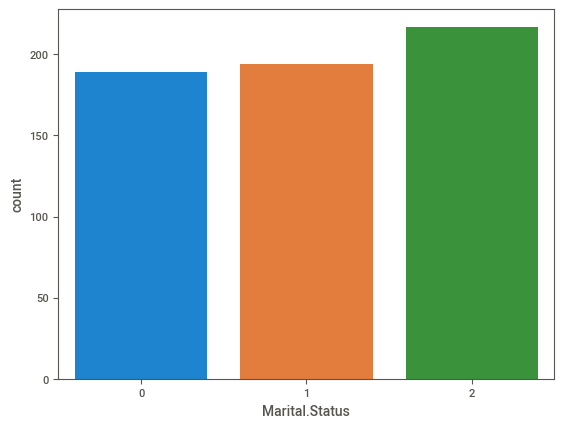

In [119]:
sns.countplot(fraud['Marital.Status'])

0=Divorced ,1 = married , 2 = single

In [120]:
x = fraud.drop('Taxable.Income', axis = 1)
y = fraud['Taxable.Income']

In [121]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [122]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int32

In [123]:
fraud['Taxable.Income'].unique() 

array([1, 0])

In [124]:
fraud['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [125]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [126]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=42) 

# Decision tree model
# C 5.0 Model with entropy criteria

In [127]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

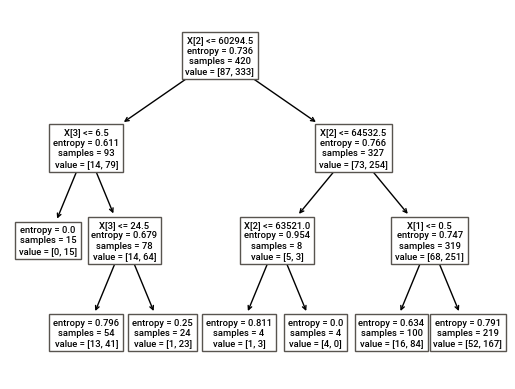

In [128]:
tree.plot_tree(model);

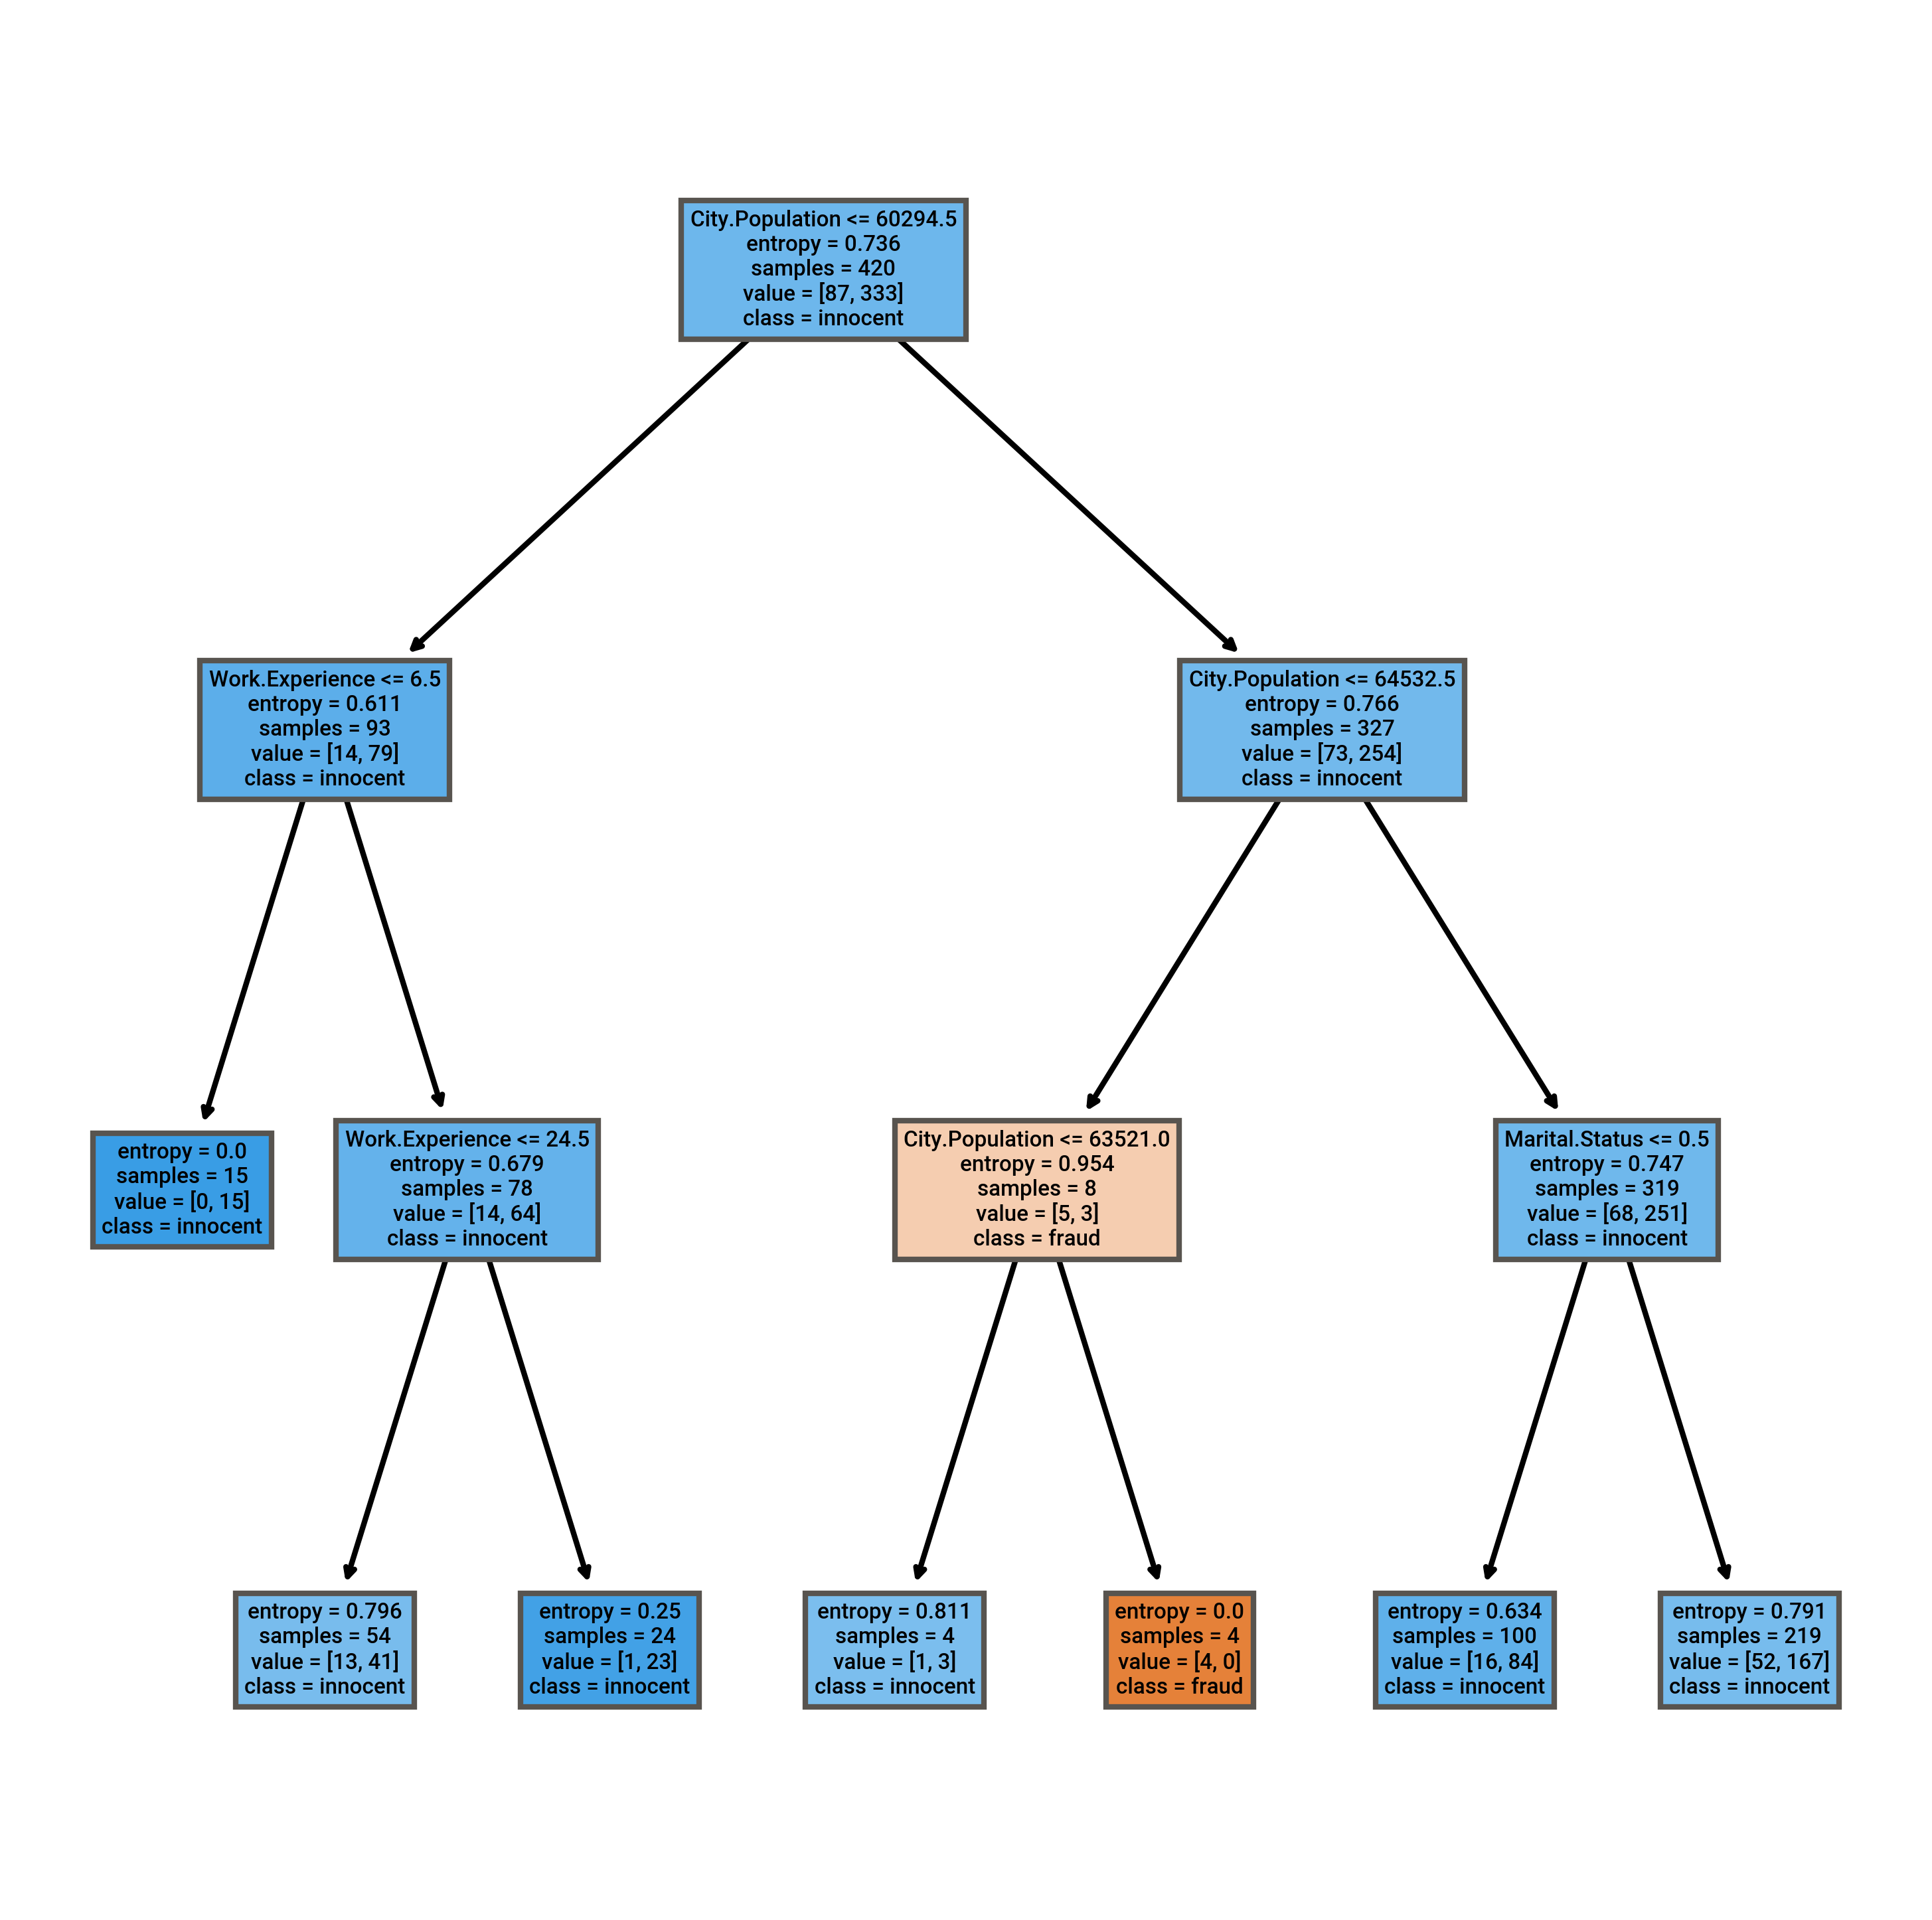

In [129]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']
cn=['fraud', 'innocent']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

city population is our important Feature

In [130]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_2 <= 60294.50
|   |--- feature_3 <= 6.50
|   |   |--- class: 1
|   |--- feature_3 >  6.50
|   |   |--- feature_3 <= 24.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  24.50
|   |   |   |--- class: 1
|--- feature_2 >  60294.50
|   |--- feature_2 <= 64532.50
|   |   |--- feature_2 <= 63521.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  63521.00
|   |   |   |--- class: 0
|   |--- feature_2 >  64532.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1



In [131]:
model.feature_importances_ 

array([0.        , 0.09088818, 0.52202864, 0.38708318, 0.        ])

In [132]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City.Population    0.522029
Work.Experience    0.387083
Marital.Status     0.090888
Undergrad          0.000000
Urban              0.000000
dtype: float64

our root node is City population followed by work experience

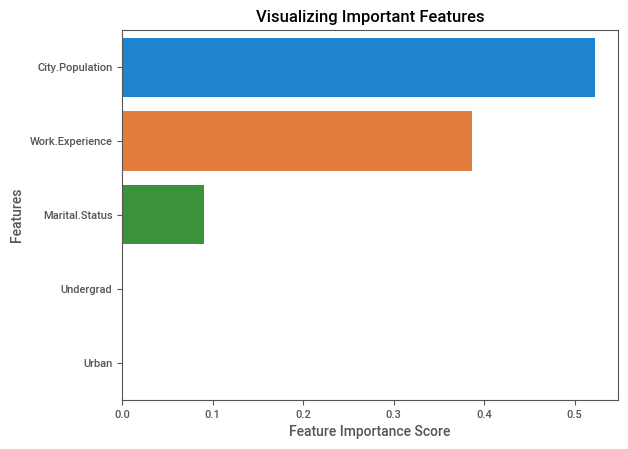

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [134]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    179
0      1
dtype: int64

In [135]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [136]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable.Income,,
0,0,37
1,1,142


In [137]:
np.mean(preds==y_test)

0.7888888888888889

our model accuracy is 78.88%

# Building Decision Tree Classifier (CART) using Gini Criteria

In [138]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [139]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [140]:
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7888888888888889

our CART model accuracy is 78.8%


In [141]:
model.feature_importances_ 

array([0.        , 0.09088818, 0.52202864, 0.38708318, 0.        ])

In [142]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City.Population    0.522029
Work.Experience    0.387083
Marital.Status     0.090888
Undergrad          0.000000
Urban              0.000000
dtype: float64

city population is our root node followed by work experience